In [ ]:
# used library sklearn 
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import datasets

In [ ]:
train=pd.read_csv('./train.csv') 
test=pd.read_csv('./test.csv')
features=train.columns[0:-1]
train.reset_index(drop=True,inplace=True)
Score=[]

# New section

In [ ]:
train.head()

,message_length,message_unique_length,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,61.1,62.1,63.1,64.1,65.1,66.1,67.1,68.1,69.1,70.1,71.1,72.1,73.1,74.1,75.1,76.1,77.1,78.1,79.1,80.1,81.1,82.1,83.1,84.1,85.1,86.1,87.1,88.1,89.1,90.1,91.1,92.1,93.1,94.1,95.1,96.1,97.1,98.1,99.1,target
0,2.564949,2.564949,0.0,0.0,0.0,0.540735,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.31266,0.08470,-0.434560,0.492730,0.229170,0.05895,-0.79101,-0.75014,-0.80611,-0.411960,0.073600,-0.093110,0.13603,-0.214590,0.060348,0.116590,-0.765300,-0.156410,0.11998,0.23391,-0.493130,0.32968,-0.17180,0.41885,-1.019800,0.56943,-1.055400,-0.051751,-0.42528,-0.278340,-0.379700,0.24834,0.59007,0.550510,0.70039,-0.90046,-0.159960,0.20219,0.36590,1
1,2.833213,2.772589,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.436193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.39292,0.45216,0.801760,0.536110,0.039244,0.50289,-0.33598,0.11965,-0.31082,0.151820,-0.054393,-0.445650,0.18534,0.028436,-0.168600,0.119050,-0.045992,0.540810,-0.10833,0.27971,0.065125,0.68128,0.88882,-0.33802,-0.222410,0.14707,-0.782660,0.245720,-0.55232,0.174830,0.076806,-0.47744,-1.11070,-0.183050,0.54657,-0.34425,0.194120,0.13025,0.15351,1
2,3.135494,3.091042,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.607234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.27820,-0.13788,-0.071708,0.211210,0.278610,0.54105,0.21022,-0.18826,0.15705,-0.386090,-1.015700,-0.849430,0.15421,0.681920,0.451520,-0.122570,0.010067,0.057531,0.61724,-0.10468,0.394340,0.26913,-0.37155,-0.13212,-0.717540,0.37372,0.159910,0.530250,-0.45421,-0.378450,-0.053285,0.44157,0.10957,-0.121990,-0.35265,-0.14393,-0.537130,0.59204,0.11093,0
3,2.772589,2.772589,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.17030,-0.55238,0.258180,0.020668,-0.010359,0.24920,-0.29887,-0.30891,-1.02810,0.090044,0.076486,-0.008180,0.25929,-0.311980,0.465910,-0.334590,-0.584010,0.559350,-0.25153,0.93179,-0.299770,0.93728,-0.66907,0.37262,0.085137,1.08840,0.163590,0.144340,-0.01201,0.052856,-0.618650,0.45215,-0.38009,-0.097763,-0.54407,0.40035,-0.078033,-0.29641,0.14097,0
4,3.044522,2.995732,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.28440,-0.23688,0.547500,-1.172700,-0.360340,-0.25992,0.49187,0.56746,-0.84576,-0.162640,0.484230,0.020135,0.35459,0.762170,0.338540,-0.070301,0.971450,0.006474,0.16040,0.66070,-0.058432,1.02510,1.05150,-0.11328,0.031359,-0.45268,0.091969,0.198200,0.41120,0.121440,0.134770,0.39504,-0.25821,-0.058188,-0.34335,-0.29056,0.857850,0.30789,0.04544,0


In [ ]:
#strandize the message length
mean=train['message_length'].mean()
std=train['message_length'].std()
train['message_length']=(train['message_length']-mean)/std
test['message_length']=(test['message_length']-mean)/std


In [ ]:
from sklearn.model_selection import KFold
incremental_data_X=[]

#split seprately the class 0 and 1 and combined then+
kf = KFold(n_splits=5,random_state=42, shuffle=True)

for _,val_index in kf.split(train):
    incremental_data_X.append(train.loc[val_index]) 

In [ ]:
incremental_data_X[2]

,message_length,message_unique_length,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,61.1,62.1,63.1,64.1,65.1,66.1,67.1,68.1,69.1,70.1,71.1,72.1,73.1,74.1,75.1,76.1,77.1,78.1,79.1,80.1,81.1,82.1,83.1,84.1,85.1,86.1,87.1,88.1,89.1,90.1,91.1,92.1,93.1,94.1,95.1,96.1,97.1,98.1,99.1,target
0,-0.270055,2.564949,0.0,0.0,0.0,0.540735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.312660,0.08470,-0.434560,0.492730,0.229170,0.058950,-0.791010,-0.750140,-0.80611,-0.411960,0.073600,-0.09311,0.136030,-0.214590,0.060348,0.116590,-0.765300,-0.15641,0.119980,0.23391,-0.493130,0.32968,-0.171800,0.418850,-1.01980,0.569430,-1.055400,-0.051751,-0.425280,-0.278340,-0.379700,0.248340,0.590070,0.550510,0.700390,-0.900460,-0.15996,0.202190,0.365900,1
6,-1.627428,1.945910,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.866050,-0.75697,0.044475,-0.212290,-0.270690,1.148100,1.000800,-0.063764,0.13311,0.276930,-0.193420,-0.47664,0.068382,-0.075219,-0.054794,-0.016988,0.316490,-0.18744,0.249990,1.14860,0.257220,0.59541,0.480590,-0.429010,-0.13737,0.336610,-0.199470,0.456450,-0.529900,-0.289160,0.425660,0.560870,-0.243440,-0.041549,-0.326930,-0.722180,0.14840,-0.500760,-0.717950,0
7,0.674526,2.995732,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.844463,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.776740,-0.12546,-0.459180,0.496020,0.467330,0.545940,0.044544,0.689740,-0.78777,0.600780,0.048209,-0.64612,-0.893500,-0.537680,-0.589400,-0.262750,0.283540,-0.31501,0.035486,1.94020,-0.927790,0.71903,0.371860,0.333180,-0.12004,0.043547,-0.654390,-0.245180,-0.605560,-0.578520,-0.114430,-0.654460,0.437500,0.414860,-0.163170,-0.483440,-0.24935,-0.353390,0.191170,1
18,0.883513,3.044522,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.447576,...,0.023370,-0.55524,0.527600,-0.320500,0.291370,-0.027016,0.122730,0.140360,-0.46629,-0.256830,-0.331840,-0.39084,0.419330,0.254100,-0.340460,0.392660,-0.133010,0.22105,0.125260,0.38681,0.501400,0.86033,0.076491,-0.120680,-0.57401,0.197290,-0.437100,0.058088,-0.403270,0.107220,0.169210,-0.289330,-0.321650,-0.244910,-0.084234,-0.398650,-0.46192,1.074700,-0.765590,0
24,-0.107558,2.639057,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.076700,-1.33320,-0.076049,0.101850,-0.025878,0.079662,-0.056504,-1.093800,-0.26547,-0.608930,0.106130,-0.40499,0.954110,0.113690,-0.178430,0.504870,-0.379230,-0.42778,0.433940,0.89513,-0.099017,0.44055,-0.288990,0.443780,-0.55848,0.083045,-0.083615,-0.986680,-0.034855,0.236940,-0.359490,0.510360,0.459420,0.661240,0.661420,-0.172040,-0.56982,0.362950,-0.274280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6758,0.185237,2.772589,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.533200,-0.63050,-0.125070,-0.080766,0.149740,0.216870,-0.245610,-0.728160,-0.41407,-0.022019,0.417520,-0.13065,1.186500,0.218230,-0.105160,0.066539,0.127490,0.64994,0.796590,0.23108,0.233660,-0.69400,-0.061854,0.043175,0.28249,0.575290,-0.128550,0.275170,-0.555750,0.161790,0.296560,0.017275,0.054799,1.066400,0

In [ ]:
# svclassifier = SVC(kernel='poly', degree=8)
# svclassifier.fit(X_train, y_train)


In [ ]:
# reultant of two vector 
def get_vector(a,b):
  r_a=a.shape[0]
  r_b=b.shape[0]
  if(r_a>r_b):
    b=np.append(b,a[r_b:],axis=0)
  elif(r_b>r_a):
    a=np.append(a,b[r_a:],axis=0)
  
  return a,b


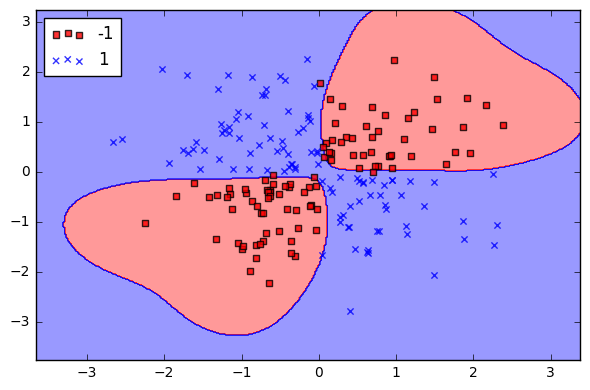


* 1
* 2

In [ ]:
# clf = svm.SVC(decision_function_shape='ovo')  # this will decide the best kernel for the data set
X=incremental_data_X[0].copy()
y=X['target']
X.drop(columns=['target'],inplace=True)


tr1=SVC( kernel="rbf" )
tr1.fit(X,y)
sv1=tr1.support_vectors_
y_test=tr1.predict(X) 
print("train_Accuracy1:",metrics.accuracy_score(y_test, y))

X=incremental_data_X[1].copy()
y=X['target']
X.drop(columns=['target'],inplace=True)

tr2=SVC( kernel="rbf" )
tr2.fit( X,y )
sv2=tr2.support_vectors_
# sv2,sv1=get_vector(sv2,sv1)
tr1.support_vectors_=np.append(sv1,sv2,axis=0)# result updated 

y_test=tr1.predict(X) 
print("train_Accuracy2:",metrics.accuracy_score(y_test, y)) # accuracy score till second 

X=incremental_data_X[2].copy()
y=X['target']
X.drop(columns=['target'],inplace=True)

tr3=SVC( kernel='rbf')
tr3.fit(X,y)
sv3=tr3.support_vectors_
sv1=tr1.support_vectors_
#sv3,sv1=get_vector(sv3,sv1)
tr1.support_vectors_=np.append(sv1,sv3,axis=0)# # result again stored 



train_Accuracy1: 0.7582903463522476
train_Accuracy2: 0.6971260132645541


In [ ]:
y_test=tr1.predict(X) # give whatever given to the training set as a input example x 


In [ ]:
# Model Accuracy: how often is the classifier correct?
print("train_Accuracy:",metrics.accuracy_score(y_test, y))


train_Accuracy: 0.7148120854826824


In [ ]:
y_test=tr1.predict(test.iloc[:,0:-1])
print("test_Accuracy:",metrics.accuracy_score(test.iloc[:,-1], y_test))

test_Accuracy: 0.6923076923076923
